<p style='text-align: center'><a href=https://www.biozentrum.uni-wuerzburg.de/cctb/research/supramolecular-and-cellular-simulations/>Supramolecular and Cellular Simulations</a> (Prof. Fischer)<br>Center for Computational and Theoretical Biology - CCTB<br>Faculty of Biology, University of Würzburg</p>

<p style='text-align: center'><br><br>We are looking forward to your comments and suggestions. Please send them to: <br><br></p>
    
 <p style='text-align: center'>   <a href=andreas.kuhn@uni.wuerzburg.de>andreas.kuhn@uni.wuerzburg.de</a> or <a href=sabine.fischer@uni.wuerzburg.de>sabine.fischer@uni.wuerzburg.de</a></p>

<h1><p style='text-align: center'> Introduction to Julia </p></h1>


# Data analysis
Data analysis is typical done in one of two datastructures: Arrays or Dataframes.

Arrays are mostly used when the data is not highly dimensional and the performance is relevant. A good example would be 2D/3D position data produced by an agent based model or extracted from image anaylsis. Such data is not very complex, as it is "only" coordinates over time.

Compared to other languages like `Python` or `R`, `Julia` has a very powerful array implementation. As, you have already learned all the neccesary basics how to use arrays in the datastructure chapter of this course, we won't focus too much on arrays in this chapter.

But if you have more complex high dimensonal data, data is typically represented in the form of so called `DataFrames`. `R` and `Python` are quite famous for their packages/package collections `dplyr/tidyverse` resp. `pandas/scipy` which provide many useful tools for working with `DataFrames`. But `Julia` is also well equipped for working with `DataFrames`. The packages `DataFrames` and `Statistics` provide a similar functionality in `Julia`.

We will also use the pacakges `CSV` for importing/exporting data, the packages `Chain` and `DataFramesMeta` for a more convenient syntax, the `Dates` packages for dealing with dates and of course `CairoMakie` for plotting.

In [1]:
using DataFrames, Statistics
using CSV,Chain, DataFramesMeta, Dates
using CairoMakie

### 1. Dataset

In this notebook, we are going to analyse the weather of our beautiful home town Würzburg from 1948 until 2021. The data we are using (and much more) is freely available on the website of the "Deutscher Wetterdienst" https://cdc.dwd.de/portal/ . Even though the website is not very pleasant to use ;).   

The first step is to import the Data in the file dc.csv as a `DataFrame` using the `CSV` and `DataFrame` package. 

In [2]:
data = DataFrame(CSV.File("dc.csv"))

Row,Zeit,Temperatur Min,Temperatur Max,Temperatur,Luftfeuchtigkeit,Niederschlag,Niederschlagsart,Bedeckung,Sonnenscheindauer,Datum,Kategorie
,String31,Float64,Float64,Float64,Float64,Float64,String7?,Float64,Int64,String15,String31
1,1947-12-31T23:00Z,-2.6,2.9,0.27,88.91,0.0,missing,NaN,0,1948/01/01,Overcast
2,1948-01-01T23:00Z,2.8,10.0,6.46,91.46,0.0,missing,NaN,0,1948/01/02,Overcast
3,1948-01-02T23:00Z,10.7,12.4,11.7,89.08,0.0,missing,NaN,0,1948/01/03,Overcast
4,1948-01-03T23:00Z,5.5,11.7,9.81,78.96,0.0,missing,NaN,0,1948/01/04,Overcast
5,1948-01-04T23:00Z,4.7,11.8,7.88,80.33,0.0,missing,NaN,0,1948/01/05,Overcast
6,1948-01-05T23:00Z,1.6,5.4,3.23,76.08,0.0,missing,NaN,0,1948/01/06,Overcast
7,1948-01-06T23:00Z,1.8,10.4,6.75,90.33,0.0,missing,NaN,0,1948/01/07,Overcast
8,1948-01-07T23:00Z,3.5,9.6,5.76,73.0,0.0,missing,NaN,0,1948/01/08,Overcast
9,1948-01-08T23:00Z,1.9,5.6,3.43,73.75,0.0,missing,NaN,0,1948/01/09,Overcast


Note: If not all colums are displayed, you can change the number of vertical displayed characters in a jupyter notebook by the command: `ENV["COLUMNS"] = 250`. Default value is 100, can be increased to a number that fit good to your screen. 

In [3]:
ENV["COLUMNS"] = 350;

### 2. Chained operations

As most of the time :( not all Datatypes are detected correctly) we want to cast the Datum column from a `String` to a `Date` object from the `Dates` package. 
To do this we first have to replace the `/` with `-` and then call the `Date()` function on the `String`. We could do this step by step or in one step as two nested functions.

Such chained operations on the same dataset are quite common in data analysis therefore, the `chain` package was created which allows us to use the `@chain` macro for a more readable syntax :

``` julia
#nested version

modified_data = operation3(operation2(operation1(data,...),...),...)

#which could be written out as 

modified_data = operation1(data,...)
modified_data = operation2(modified_data,...)
modified_data = operation3(modified_data,...)


#which is the same as: 

modified_data = @chain data begin
    operation1(...)
    operation2(...)
    operation3(...)
end
    
```

Note: `Macros` are a special and very powerful feature of the Julia language. We have already seen in the import export notebook, that "Julia represents its own code as a data structure of the language itself", which makes its possible to evaluate Strings as sourcecode. Macros take this concept one step futher and generate and directly execute source code during runtime. In the example above the `@chain` macro takes the 3 operations/functions as input and then generates and runs the nested version of the code when the program is executed. This makes macros very powerful as they can generate and instantly execute basically anything, from single functions, complex nested functions, datastructues, whole subprogramms, ... . If not mentioned otherwise all of the macros you will see in this course can be used in a similar way as functions but if you use different macros in your own coding you should always make sure you know what they are doing.   


In [4]:
#cast datum to date
data.Datum = @chain data.Datum begin
    replace.("/" => "-") 
    Date.()
end
data

Row,Zeit,Temperatur Min,Temperatur Max,Temperatur,Luftfeuchtigkeit,Niederschlag,Niederschlagsart,Bedeckung,Sonnenscheindauer,Datum,Kategorie
,String31,Float64,Float64,Float64,Float64,Float64,String7?,Float64,Int64,Date,String31
1,1947-12-31T23:00Z,-2.6,2.9,0.27,88.91,0.0,missing,NaN,0,1948-01-01,Overcast
2,1948-01-01T23:00Z,2.8,10.0,6.46,91.46,0.0,missing,NaN,0,1948-01-02,Overcast
3,1948-01-02T23:00Z,10.7,12.4,11.7,89.08,0.0,missing,NaN,0,1948-01-03,Overcast
4,1948-01-03T23:00Z,5.5,11.7,9.81,78.96,0.0,missing,NaN,0,1948-01-04,Overcast
5,1948-01-04T23:00Z,4.7,11.8,7.88,80.33,0.0,missing,NaN,0,1948-01-05,Overcast
6,1948-01-05T23:00Z,1.6,5.4,3.23,76.08,0.0,missing,NaN,0,1948-01-06,Overcast
7,1948-01-06T23:00Z,1.8,10.4,6.75,90.33,0.0,missing,NaN,0,1948-01-07,Overcast
8,1948-01-07T23:00Z,3.5,9.6,5.76,73.0,0.0,missing,NaN,0,1948-01-08,Overcast
9,1948-01-08T23:00Z,1.9,5.6,3.43,73.75,0.0,missing,NaN,0,1948-01-09,Overcast


### 3. Cleaing and structuring data

In order to make our life easier and to stay consistent with the used language we should rename the columns to shorter english terms. We use the function `rename!` and the `@chain` macro to make the code more readable.

In [5]:
@chain data begin
    # "Temperatur Min" and "Temerpatur Max" have to be renamed separately as they are Strings and not Symbols due to the space  
    # never use Strings as colums names, as they always cause problems like this
    rename!(:"Temperatur Min" => :temp_min)
    rename!(:"Temperatur Max" => :temp_max)
    rename!(:Luftfeuchtigkeit => :humidity, :Niederschlag => :rain, :Niederschlagsart =>:preci_type, :Temperatur => :temp)
    rename!(:Bedeckung => :cover, :Sonnenscheindauer => :sun, :Datum => :date, :Kategorie => :weather)
end


Row,Zeit,temp_min,temp_max,temp,humidity,rain,preci_type,cover,sun,date,weather
,String31,Float64,Float64,Float64,Float64,Float64,String7?,Float64,Int64,Date,String31
1,1947-12-31T23:00Z,-2.6,2.9,0.27,88.91,0.0,missing,NaN,0,1948-01-01,Overcast
2,1948-01-01T23:00Z,2.8,10.0,6.46,91.46,0.0,missing,NaN,0,1948-01-02,Overcast
3,1948-01-02T23:00Z,10.7,12.4,11.7,89.08,0.0,missing,NaN,0,1948-01-03,Overcast
4,1948-01-03T23:00Z,5.5,11.7,9.81,78.96,0.0,missing,NaN,0,1948-01-04,Overcast
5,1948-01-04T23:00Z,4.7,11.8,7.88,80.33,0.0,missing,NaN,0,1948-01-05,Overcast
6,1948-01-05T23:00Z,1.6,5.4,3.23,76.08,0.0,missing,NaN,0,1948-01-06,Overcast
7,1948-01-06T23:00Z,1.8,10.4,6.75,90.33,0.0,missing,NaN,0,1948-01-07,Overcast
8,1948-01-07T23:00Z,3.5,9.6,5.76,73.0,0.0,missing,NaN,0,1948-01-08,Overcast
9,1948-01-08T23:00Z,1.9,5.6,3.43,73.75,0.0,missing,NaN,0,1948-01-09,Overcast


Now we want to add columns for year, month and day. This can be done using the getter function `year(), month(), day() and monthday()` from the `Date` object and the `@transform` macro from `DataFramesMeta`. The `@transform` macro creates a new DataFrame which contains new columns which can be a function of existing colums. If you are applying a function to each element of a colum you need to use the `.` version of the function. 

Note: Many of the macros from `DataFramesMeta` also exist in a mutating version (`!`) which does not return a new dataframe but changes the existing one.

In [6]:
#add colums for year ,month and day and dayof month
data = @chain data begin 
    @transform(:year = year.(:date))
    @transform(:month = month.(:date))
    @transform(:day = day.(:date))
    @transform(:monthday = monthday.(:date))
end
data
data_5 = data

Row,Zeit,temp_min,temp_max,temp,humidity,rain,preci_type,cover,sun,date,weather,year,month,day,monthday
,String31,Float64,Float64,Float64,Float64,Float64,String7?,Float64,Int64,Date,String31,Int64,Int64,Int64,Tuple…
1,1947-12-31T23:00Z,-2.6,2.9,0.27,88.91,0.0,missing,NaN,0,1948-01-01,Overcast,1948,1,1,"(1, 1)"
2,1948-01-01T23:00Z,2.8,10.0,6.46,91.46,0.0,missing,NaN,0,1948-01-02,Overcast,1948,1,2,"(1, 2)"
3,1948-01-02T23:00Z,10.7,12.4,11.7,89.08,0.0,missing,NaN,0,1948-01-03,Overcast,1948,1,3,"(1, 3)"
4,1948-01-03T23:00Z,5.5,11.7,9.81,78.96,0.0,missing,NaN,0,1948-01-04,Overcast,1948,1,4,"(1, 4)"
5,1948-01-04T23:00Z,4.7,11.8,7.88,80.33,0.0,missing,NaN,0,1948-01-05,Overcast,1948,1,5,"(1, 5)"
6,1948-01-05T23:00Z,1.6,5.4,3.23,76.08,0.0,missing,NaN,0,1948-01-06,Overcast,1948,1,6,"(1, 6)"
7,1948-01-06T23:00Z,1.8,10.4,6.75,90.33,0.0,missing,NaN,0,1948-01-07,Overcast,1948,1,7,"(1, 7)"
8,1948-01-07T23:00Z,3.5,9.6,5.76,73.0,0.0,missing,NaN,0,1948-01-08,Overcast,1948,1,8,"(1, 8)"
9,1948-01-08T23:00Z,1.9,5.6,3.43,73.75,0.0,missing,NaN,0,1948-01-09,Overcast,1948,1,9,"(1, 9)"


In order to make our following data analysis easier we are going to cut out all the 29th of February and the incomplete year 2022, so that every year is 365 days long (shame on me, for not finding a better workaround;). For strange reason tuples cannot be filtered, therefore the column `monthday` has to be casted to `String`. The `@subset` macro  from the `DataFrameseMeta` package creates a subset of our data without 2022 and all 29th Februaries. 

In [7]:
data.monthday = string.(data.monthday)
# cut februar the 29th in every year and the year 2022 all together to make data analysis easier 
data = @subset(data,:monthday .!= "(2, 29)",:year .!= 2022)

Row,Zeit,temp_min,temp_max,temp,humidity,rain,preci_type,cover,sun,date,weather,year,month,day,monthday
,String31,Float64,Float64,Float64,Float64,Float64,String7?,Float64,Int64,Date,String31,Int64,Int64,Int64,String
1,1947-12-31T23:00Z,-2.6,2.9,0.27,88.91,0.0,missing,NaN,0,1948-01-01,Overcast,1948,1,1,"(1, 1)"
2,1948-01-01T23:00Z,2.8,10.0,6.46,91.46,0.0,missing,NaN,0,1948-01-02,Overcast,1948,1,2,"(1, 2)"
3,1948-01-02T23:00Z,10.7,12.4,11.7,89.08,0.0,missing,NaN,0,1948-01-03,Overcast,1948,1,3,"(1, 3)"
4,1948-01-03T23:00Z,5.5,11.7,9.81,78.96,0.0,missing,NaN,0,1948-01-04,Overcast,1948,1,4,"(1, 4)"
5,1948-01-04T23:00Z,4.7,11.8,7.88,80.33,0.0,missing,NaN,0,1948-01-05,Overcast,1948,1,5,"(1, 5)"
6,1948-01-05T23:00Z,1.6,5.4,3.23,76.08,0.0,missing,NaN,0,1948-01-06,Overcast,1948,1,6,"(1, 6)"
7,1948-01-06T23:00Z,1.8,10.4,6.75,90.33,0.0,missing,NaN,0,1948-01-07,Overcast,1948,1,7,"(1, 7)"
8,1948-01-07T23:00Z,3.5,9.6,5.76,73.0,0.0,missing,NaN,0,1948-01-08,Overcast,1948,1,8,"(1, 8)"
9,1948-01-08T23:00Z,1.9,5.6,3.43,73.75,0.0,missing,NaN,0,1948-01-09,Overcast,1948,1,9,"(1, 9)"


### 4. Plotting

Now we can plot the average Temperatur on each day in Würzubrg since 1948 using `CairoMakie`. Each colum of `DataFrame` is a Vector, therefore we can use the access function `DataFrame.column` as a direct input in our plot. 

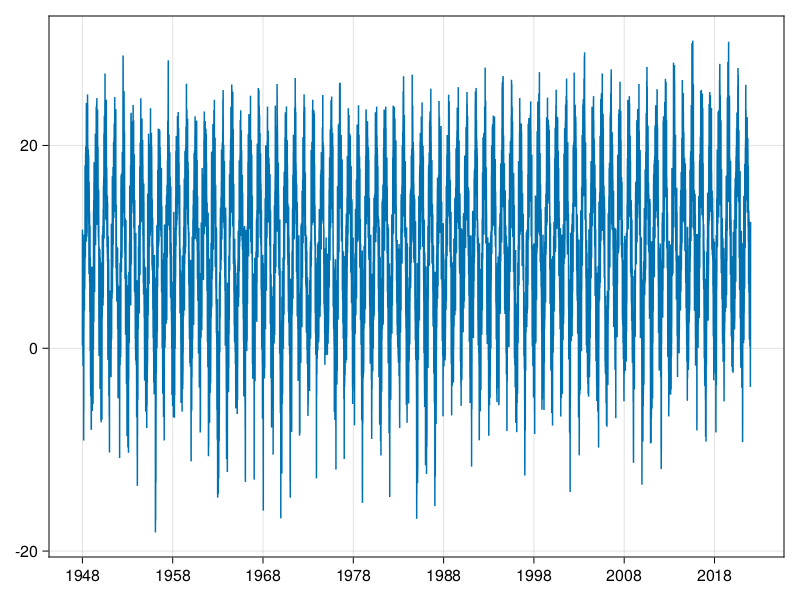

In [8]:
f1 = Figure()
#custom axis where a datapoint every 10 years is maped to its corresponding year. For a refresh on custom axis in CairoMakie revisit the chapter on Plotting. 
ax1_1 = Axis(f1[1, 1],xticks = (1:10*365:nrow(data), string.(data.year)[1:10*365:nrow(data)] ))
line1 = lines!(ax1_1,data.temp)
f1

Or the Humidity on each day. 

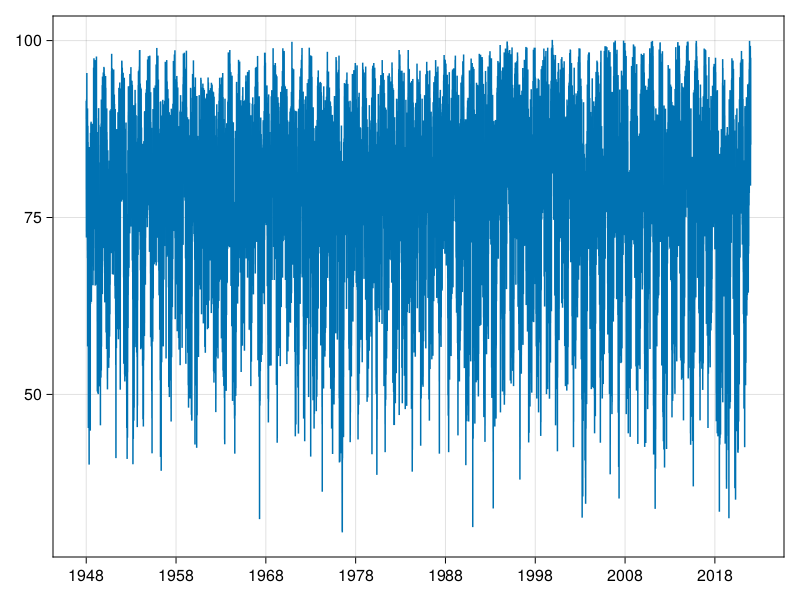

In [9]:
f2 = Figure()
ax2_1 = Axis(f2[1, 1],xticks = (1:10*365:nrow(data), string.(data.year)[1:10*365:nrow(data)] ))
line2 = lines!(ax2_1,data.humidity)
f2

But as you might have guessed before, plots with 27010 datapoints are not very useful. Therefore, we have to perform some manipulations with our data to extract interesting information. 
For example we could ask ourselves what was the average over all datapoints? For this purpose we can use the `@combine` macro from the `DataFramesMeta` package to create a new DataFrame with that information and the `mean` function from the `Statistics` package.

In [10]:
data_sum = @combine(data,:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))

Row,avg_temp,avg_temp_max,avg_temp_min,avg_humi
,Float64,Float64,Float64,Float64
1,9.498,13.6302,5.57822,76.7254


Now we know the average temperature over all years, but it would also be interesting to know the average temperature per year. For this case we use the `groupby(DataFrame,:columnname )` function which creates a `GroupedDataFrame`. You can think of a `GroupedDataFrame` as an array of `DataFrames`. Whereas all entries in one group have the same value of the given colummnname.

Note: This way of doing data analysis is called the "Split-Apply-Combine Strategy" and is based on a paper of Hadely Wickham  (https://www.jstatsoft.org/article/view/v040i01). 

In [11]:
g_data_year = groupby(data,:year) 

Row,Zeit,temp_min,temp_max,temp,humidity,rain,preci_type,cover,sun,date,weather,year,month,day,monthday
,String31,Float64,Float64,Float64,Float64,Float64,String7?,Float64,Int64,Date,String31,Int64,Int64,Int64,String
1,1947-12-31T23:00Z,-2.6,2.9,0.27,88.91,0.0,missing,NaN,0,1948-01-01,Overcast,1948,1,1,"(1, 1)"
2,1948-01-01T23:00Z,2.8,10.0,6.46,91.46,0.0,missing,NaN,0,1948-01-02,Overcast,1948,1,2,"(1, 2)"
3,1948-01-02T23:00Z,10.7,12.4,11.7,89.08,0.0,missing,NaN,0,1948-01-03,Overcast,1948,1,3,"(1, 3)"
4,1948-01-03T23:00Z,5.5,11.7,9.81,78.96,0.0,missing,NaN,0,1948-01-04,Overcast,1948,1,4,"(1, 4)"
5,1948-01-04T23:00Z,4.7,11.8,7.88,80.33,0.0,missing,NaN,0,1948-01-05,Overcast,1948,1,5,"(1, 5)"
6,1948-01-05T23:00Z,1.6,5.4,3.23,76.08,0.0,missing,NaN,0,1948-01-06,Overcast,1948,1,6,"(1, 6)"
7,1948-01-06T23:00Z,1.8,10.4,6.75,90.33,0.0,missing,NaN,0,1948-01-07,Overcast,1948,1,7,"(1, 7)"
8,1948-01-07T23:00Z,3.5,9.6,5.76,73.0,0.0,missing,NaN,0,1948-01-08,Overcast,1948,1,8,"(1, 8)"
9,1948-01-08T23:00Z,1.9,5.6,3.43,73.75,0.0,missing,NaN,0,1948-01-09,Overcast,1948,1,9,"(1, 9)"


In this case we get a `GroupedDataframe` with 74 groups  one for each year between 1948 and 2021.

Now we can apply the `@combine` macro on this `GroupedDataframe` and create a new dataframe with 74 rows, one for each year. The `mean` function from the `Statistics` package can calculate the mean of the given values. 

In [12]:
temp_per_year = @combine(g_data_year,:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))

Row,year,avg_temp,avg_temp_max,avg_temp_min,avg_humi
,Int64,Float64,Float64,Float64,Float64
1,1948,9.63614,14.3619,5.53151,76.9204
2,1949,9.99866,14.9542,5.56603,74.417
3,1950,9.3683,13.7644,5.35342,76.6385
4,1951,9.51685,13.6444,5.65753,77.159
5,1952,8.96041,12.7663,5.22329,76.2925
6,1953,9.60244,13.9356,5.4337,76.1542
7,1954,8.46737,12.4696,4.72137,77.6146
8,1955,8.12162,12.2474,4.3211,79.5648
9,1956,7.58,11.5227,3.92767,78.1327


We can plot this together with the average temp over all years. 

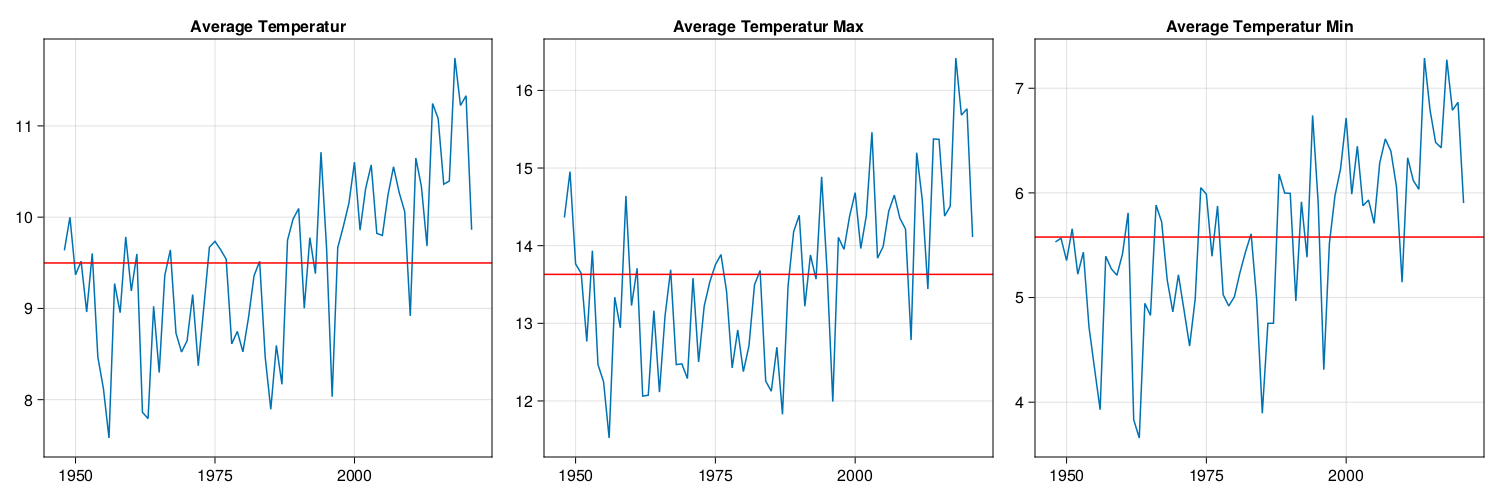

In [13]:
f3 = Figure(resolution = ( 1500,500))
ax3_1 = Axis(f3[1, 1],title = "Average Temperatur") 
line3_1_1 = lines!(ax3_1, temp_per_year.year,temp_per_year.avg_temp)
line3_1_2 = hlines!(ax3_1, data_sum.avg_temp,color = "red")

ax3_2 = Axis(f3[1, 2],title = "Average Temperatur Max") 
line3_2_1 = lines!(ax3_2, temp_per_year.year,temp_per_year.avg_temp_max)
line3_2_2 = hlines!(ax3_2, data_sum.avg_temp_max,color = "red")

ax3_3 = Axis(f3[1, 3],title = "Average Temperatur Min") 
line3_3_1 = lines!(ax3_3, temp_per_year.year,temp_per_year.avg_temp_min)
line3_3_2 = hlines!(ax3_3, data_sum.avg_temp_min,color = "red")

f3

And what can we say ? Climate change appears to be real ;). 

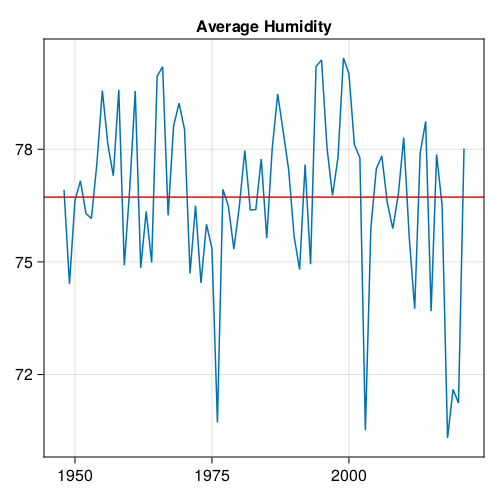

In [14]:
f4 = Figure(resolution = (500,500))
ax4_1 = Axis(f4[1, 1],title = "Average Humidity") #xticks = (194, string.(data.year)[1:10*365:nrow(data)] ))
line4_1_1 = lines!(ax4_1, temp_per_year.year,temp_per_year.avg_humi)
line4_1_2 = hlines!(ax4_1, data_sum.avg_humi,color = "red")
f4

The same plot for the humidity doesn't give a similar clear picture of a change over the years. But maybe we are just not educated enough on climate science to interpret this data accordingly. 

But we could look at another way of grouping the data which we can probably understand: Grouping them my month, to find the average values per month. 

In [15]:
g_data_m = groupby(data,:month) 
temp_per_month = @combine(g_data_m,:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))

Row,month,avg_temp,avg_temp_max,avg_temp_min,avg_humi
,Int64,Float64,Float64,Float64,Float64
1,1,0.307297,2.66643,-2.01997,85.0792
2,2,1.21448,4.43161,-1.68055,81.1108
3,3,5.07602,9.30214,1.19712,74.3989
4,4,9.33944,14.1875,4.53856,67.7858
5,5,13.6198,18.6663,8.52746,68.996
6,6,16.8916,21.9178,11.8626,70.2254
7,7,18.732,23.9393,13.6074,69.3667
8,8,18.2747,23.6381,13.2581,70.9491
9,9,14.5033,19.6644,9.91973,76.4296


This gives a dataframe with 12 columns one for each month. Now we can plot the average humidity per month. 

In [16]:
#small trick : 
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dez"]
# can be written faster as : 
months = split("Jan Feb Mar Apr May Jun Jul Aug Sep Okt Nov Dez")

12-element Vector{SubString{String}}:
 "Jan"
 "Feb"
 "Mar"
 "Apr"
 "May"
 "Jun"
 "Jul"
 "Aug"
 "Sep"
 "Okt"
 "Nov"
 "Dez"

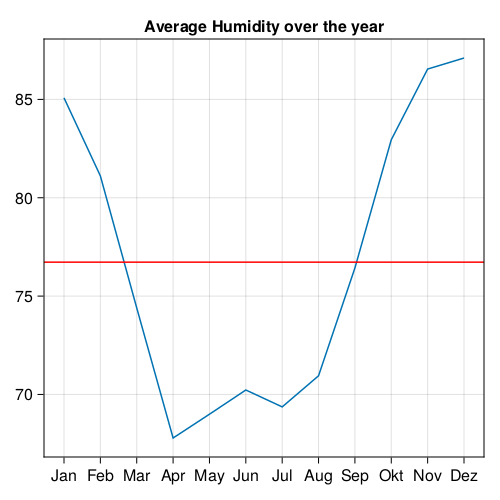

In [17]:
f5 = Figure(resolution = (500,500))
ax5_1 = Axis(f5[1, 1],title = "Average Humidity over the year" ,xticks = (1:12, months))
line5_1_1 = lines!(ax5_1, temp_per_month.month,temp_per_month.avg_humi)
line5_1_2 = hlines!(ax5_1, data_sum.avg_humi,color = "red")
f5

We can see that the humidity is higher in the winter months than in the summer. With the help of some googling (https://www.luftfeuchtigkeit-raumklima.de/im-sommer.php) we can make sense of this data: There are always two values for humidtiy: relative and absolute humidity. The absolute humidity is the amount of water vaper in the air. The maximum amount of storable water vaper in the air is temperature dependent and lower for lower temperatures. Assuming the most simple case of constant absolute humidity all over the year, then the relative humditiy (which was measured here) should be lower in the summer and higher in the winter, which is exactly what we see in our data ;).  

Now we make the same plot for the temperature values:

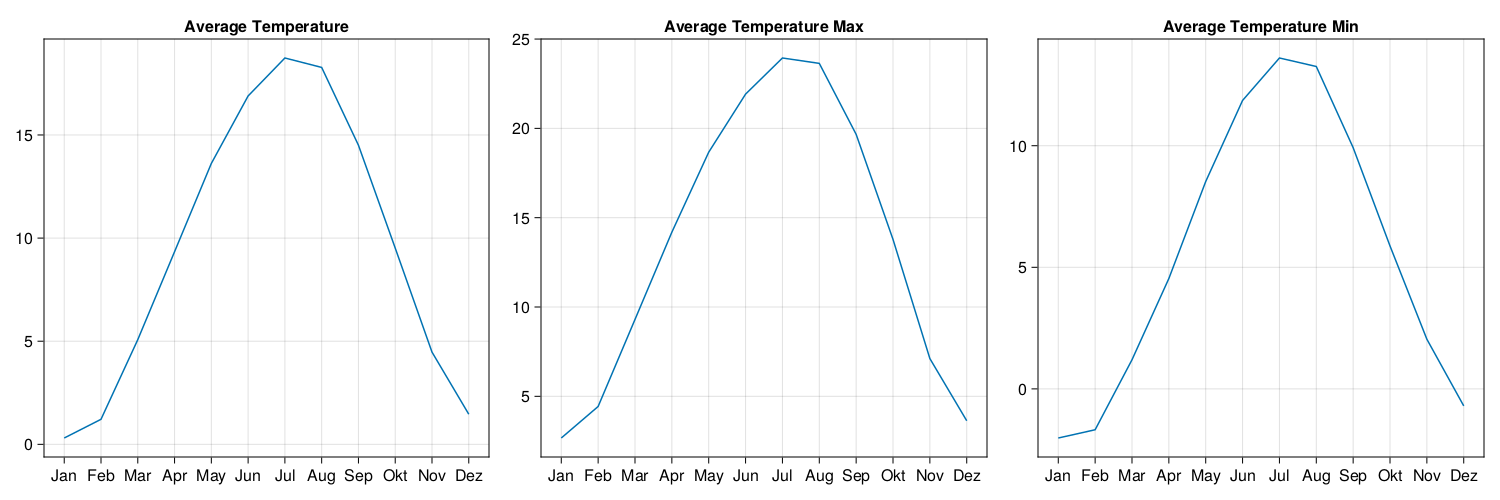

In [18]:
f6 = Figure(resolution = ( 1500,500))
ax6_1 = Axis(f6[1, 1],title = "Average Temperature",xticks = (1:12, months )) 
line6_1_1 = lines!(ax6_1, temp_per_month.month,temp_per_month.avg_temp)
#line6_1_2 = hlines!(ax6_1, data_sum.avg_temp,color = "red")

ax6_2 = Axis(f6[1, 2],title = "Average Temperature Max",xticks = (1:12, months )) 
line6_2_1 = lines!(ax6_2, temp_per_month.month,temp_per_month.avg_temp_max)
#line6_2_2 = hlines!(ax6_2, data_sum.avg_temp_max,color = "red")

ax6_3 = Axis(f6[1, 3],title = "Average Temperature Min",xticks = (1:12, months )) 
line6_3_1 = lines!(ax6_3, temp_per_month.month,temp_per_month.avg_temp_min)
#line6_3_2 = hlines!(ax6_3, data_sum.avg_temp_min,color = "red")

f6

This looks very familiar, as it is the temperature part of a typical climate diagramm from an area. A similar diagram (with probably the same underlying data) can be found on Würzburgs wikipedia page (https://de.wikipedia.org/wiki/W%C3%BCrzburg#Klima). 

### 5. Sorting data

Now we can compare the average climate with the weather in a single year. The most interesting ones are of course the most extreme ones. 

Therefore, we can search for the hottest and coldest year in our data with the `sort` function.   

In [19]:
# hottest first
sort(temp_per_year,:avg_temp,rev = true)

Row,year,avg_temp,avg_temp_max,avg_temp_min,avg_humi
,Int64,Float64,Float64,Float64,Float64
1,2018,11.744,16.4173,7.27288,70.3108
2,2020,11.3302,15.763,6.86603,71.245
3,2014,11.2457,15.374,7.28904,78.7428
4,2019,11.2241,15.6819,6.78959,71.6062
5,2015,11.0797,15.3699,6.79123,73.6887
6,1994,10.7122,14.8877,6.74027,80.2016
7,2011,10.648,15.1975,6.33589,75.6679
8,2000,10.6026,14.683,6.71616,80.0073
9,2003,10.5729,15.4611,5.87699,70.5174


In [20]:
# coldes first
sort(temp_per_year,:avg_temp,rev = false)

Row,year,avg_temp,avg_temp_max,avg_temp_min,avg_humi
,Int64,Float64,Float64,Float64,Float64
1,1956,7.58,11.5227,3.92767,78.1327
2,1963,7.79288,12.074,3.65781,76.3432
3,1962,7.8609,12.0622,3.83288,74.8408
4,1985,7.89408,12.1249,3.8937,75.6361
5,1996,8.0323,11.991,4.31041,78.0381
6,1955,8.12162,12.2474,4.3211,79.5648
7,1987,8.16805,11.8271,4.75425,79.4701
8,1965,8.29726,12.1137,4.82959,79.947
9,1972,8.37181,12.5022,4.53644,76.4969


As we can see the hottest year has been 2018 and the coldest 1956. We can then create a dataframe with the average values per month for a specific year. We can again use the `@chain` macro to do this in one step. And then plot it together with the previous data.  

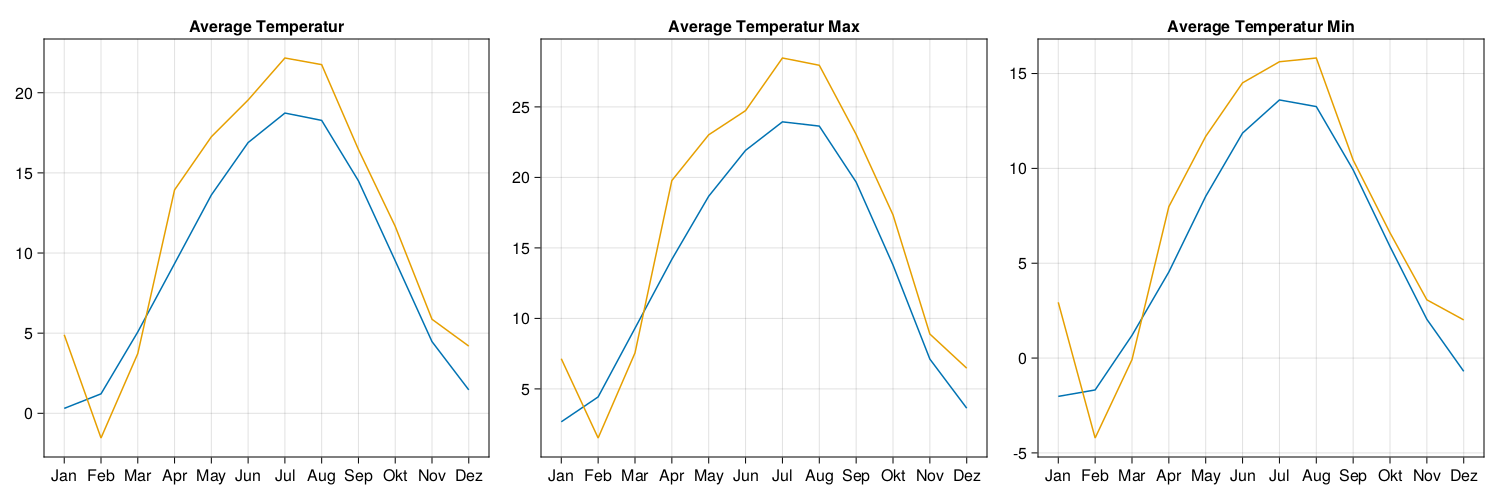

In [21]:
example_year = 2018
temp_per_month_example =  @chain data begin
    @subset(:year .== example_year)
    groupby(:month) 
    @combine(:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))
end

f7 = Figure(resolution = ( 1500,500))
ax7_1 = Axis(f7[1, 1],title = "Average Temperatur",xticks = (1:12, months )) 
line7_1_1 = lines!(ax7_1, temp_per_month.month,temp_per_month.avg_temp)
line7_1_2 = lines!(ax7_1, temp_per_month_example.month,temp_per_month_example.avg_temp)

ax7_2 = Axis(f7[1, 2],title = "Average Temperatur Max",xticks = (1:12, months )) 
line7_2_1 = lines!(ax7_2, temp_per_month.month,temp_per_month.avg_temp_max)
line7_2_2 = lines!(ax7_2, temp_per_month_example.month,temp_per_month_example.avg_temp_max)


ax7_3 = Axis(f7[1, 3],title = "Average Temperatur Min",xticks = (1:12, months )) 
line7_3_1 = lines!(ax7_3, temp_per_month.month,temp_per_month.avg_temp_min)
line7_3_2 = lines!(ax7_3, temp_per_month_example.month,temp_per_month_example.avg_temp_min)

f7

We could also be averaging the values only for every day: 

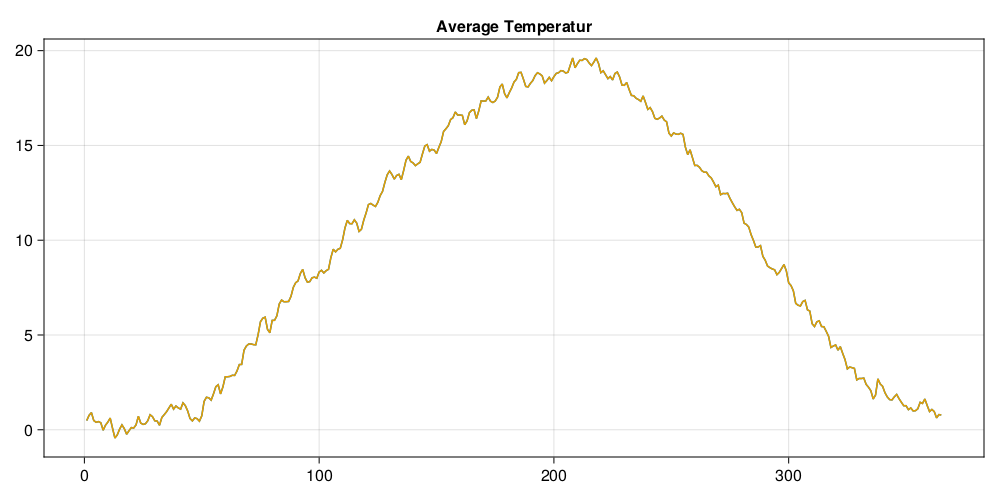

In [22]:
temp_per_day = @chain data begin 
    groupby(:monthday)
    @combine(:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))
end

f17 = Figure(resolution = ( 1000,500))
ax17_1 = Axis(f17[1, 1],title = "Average Temperatur") 
line17_1_1 = lines!(ax17_1, temp_per_day.avg_temp)
line17_1_2 = lines!(ax17_1, temp_per_day.avg_temp)
f17

This result is similar to the previous result, but surprsingly "unsmooth" as the average of 74 years per day is apperently a too small sample size, or the weather has quite strong inherent noise.  

Another quite fun question to ask, would be: What has been the hottest and coldest day on average ?  

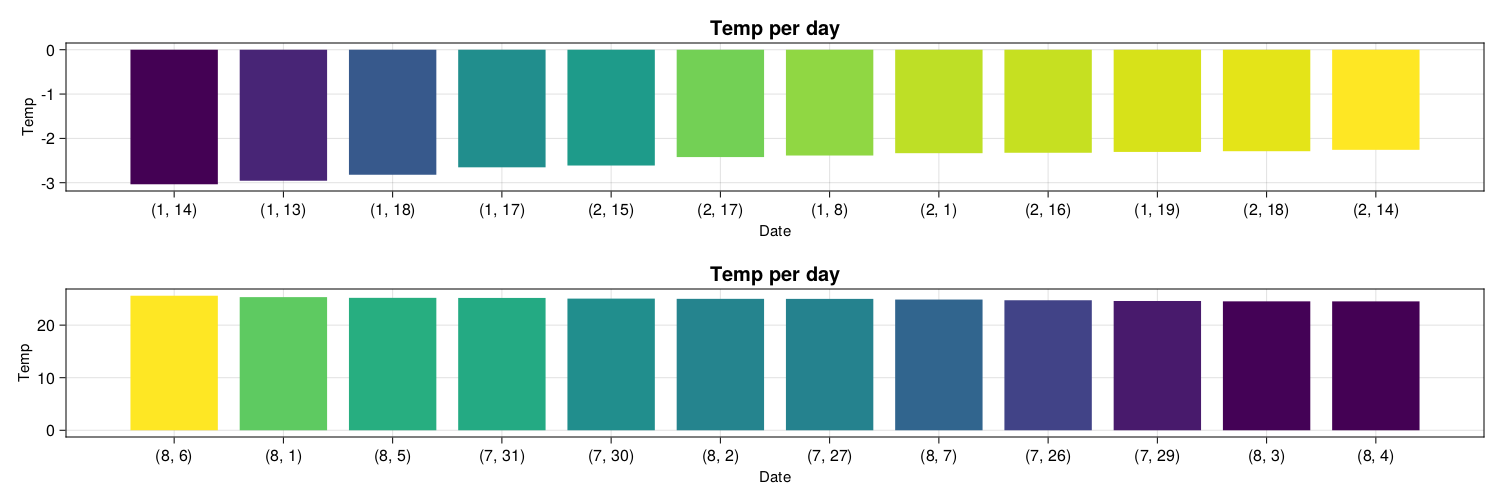

In [23]:
extreme_days_average = sort(temp_per_day,:avg_temp_min, rev = false)

f10 = Figure(resolution = (1500,500))
ax10_1 = Axis(f10[1,1], xticks = (1:12,string.(extreme_days_average.monthday[1:12])), title = " Temp per day ", titlesize = 20, xlabel = "Date", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar10_1 = barplot!(ax10_1, extreme_days_average.:avg_temp_min[1:12],color =extreme_days_average.:avg_temp_min[1:12] )

extreme_days_average = sort(temp_per_day,:avg_temp_max, rev = true)

ax10_2 = Axis(f10[2,1], xticks = (1:12,string.(extreme_days_average.monthday[1:12])), title = " Temp per day ", titlesize = 20, xlabel = "Date", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar10_2 = barplot!(ax10_2, extreme_days_average.:avg_temp_max[1:12],color =extreme_days_average.:avg_temp_max[1:12] )
f10 

This result is inline with the previous graph as these days do not all line up next to each other. Especially in the cold case appear to be two periods one in the middle of January and one in the middle of February that have been historically very cold. 

What we could also do, is to find the hottest and coldest days ever recorded in Würzburg. Therefore, we again use the `sort` function this time on the whole dataset.  

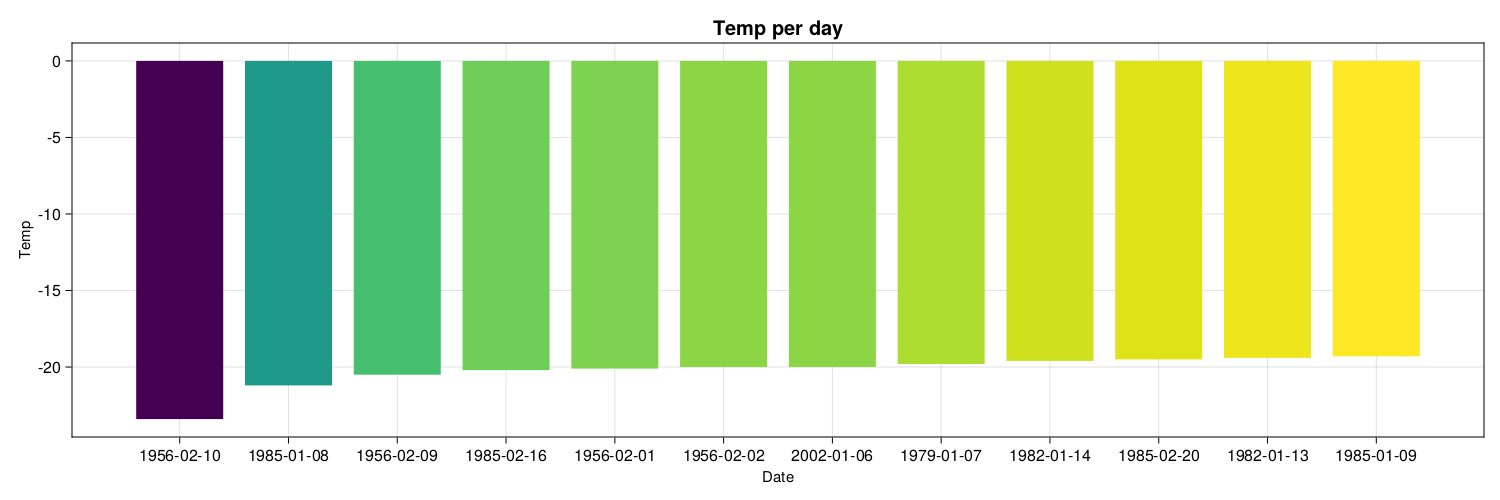

In [24]:
extreme_days = sort(data,:temp_min, rev = false)
f8 = Figure(resolution = (1500,500))
ax8_1 = Axis(f8[1,1], xticks = (1:12,string.(extreme_days.date[1:12])), title = " Temp per day ", titlesize = 20, xlabel = "Date", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar8_1 = barplot!(ax8_1, extreme_days.temp_min[1:12],color =extreme_days.temp_min[1:12] )

f8

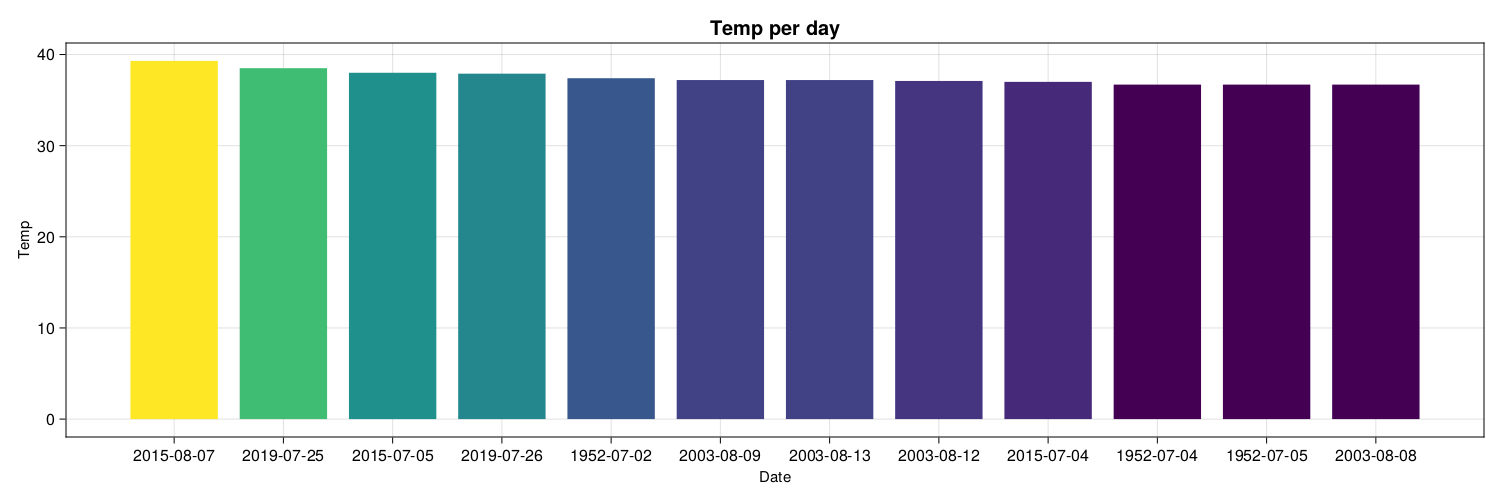

In [25]:
extreme_days = sort(data,:temp_max, rev = true)
f9 = Figure(resolution = (1500,500))
ax9_1 = Axis(f9[1,1], xticks = (1:12,string.(extreme_days.date[1:12])), title = " Temp per day ", titlesize = 20, xlabel = "Date", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar9_1 = barplot!(ax9_1, extreme_days.:temp_max[1:12],color =extreme_days.:temp_max[1:12] )

f9

We can see appart from the year 1952, which apperently had a crazy july, 9 of the 12 hottest days are less then 20 years ago. And 11 of the 12 coldest days are more than 37 years ago. This is a further indicator for climate change happening. 

### 6. Transforming Data

Another way of analysis is to calculate new parameters based on the existing data. In this case we could ask ourselves what have been the days with the biggest temperature difference. With the `@transfom`  macro we can easily add new columns to a dataframe calculated with the existing colums or by others rules.   


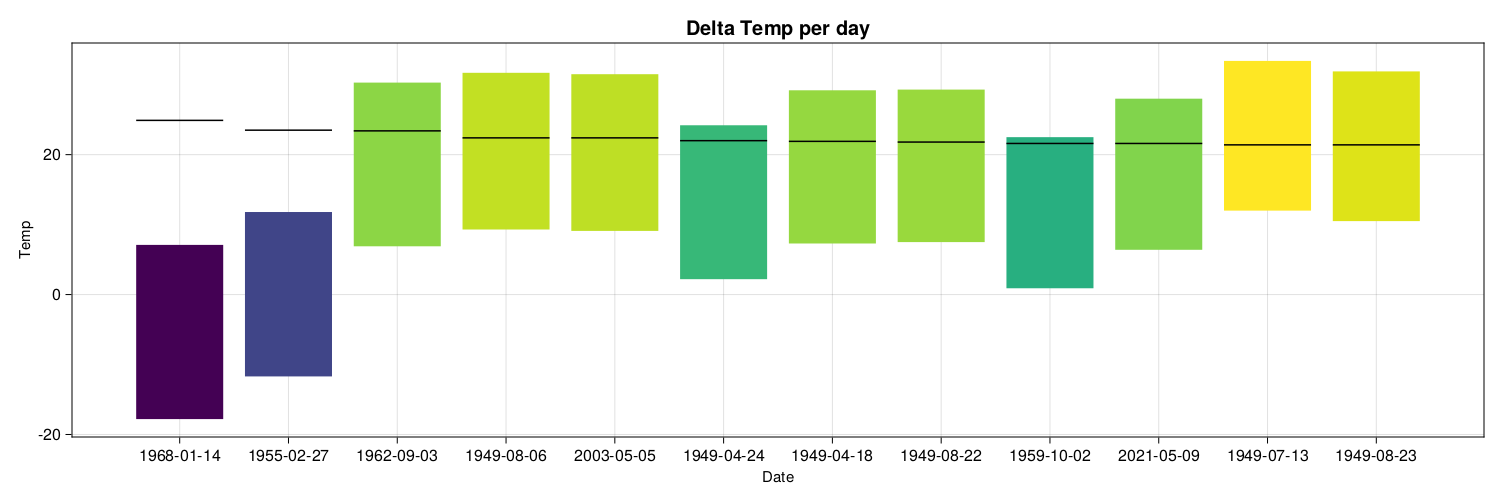

In [26]:
data_delta =  @chain data begin 
    @transform(:delta_t = :temp_max - :temp_min)
    sort!( :delta_t, rev = true)
end

f10 = Figure(resolution = (1500,500))
ax10_1 = Axis(f10[1,1], xticks = (1:12,string.(data_delta.date[1:12])), title = " Delta Temp per day ", titlesize = 20, xlabel = "Date", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar10_1 = crossbar!(ax10_1,[1:12;], data_delta.:delta_t[1:12],data_delta.:temp_min[1:12],data_delta.:temp_max[1:12],color =data_delta.:temp_min[1:12])

f10

A cross bar plot is a suitable way to display this kind of data. Where as the black lines indicate the absolute temperatur difference, the beginning and the end of the blocks indidcates the values of minimum and maximum temperature on this day. Surprisingly a day with a big temperature difference can happen in every season. But late spring and early autum are more likely. 

### 7.Using subset of data

As you might have noticed not all measured data goes back to 1948. For example daily minutes of sunhine have only been measured since 1951. Therefore, we have to filter our data before we make analysis on this parameter. We can use the `@subset` macro for that purpose as well. 

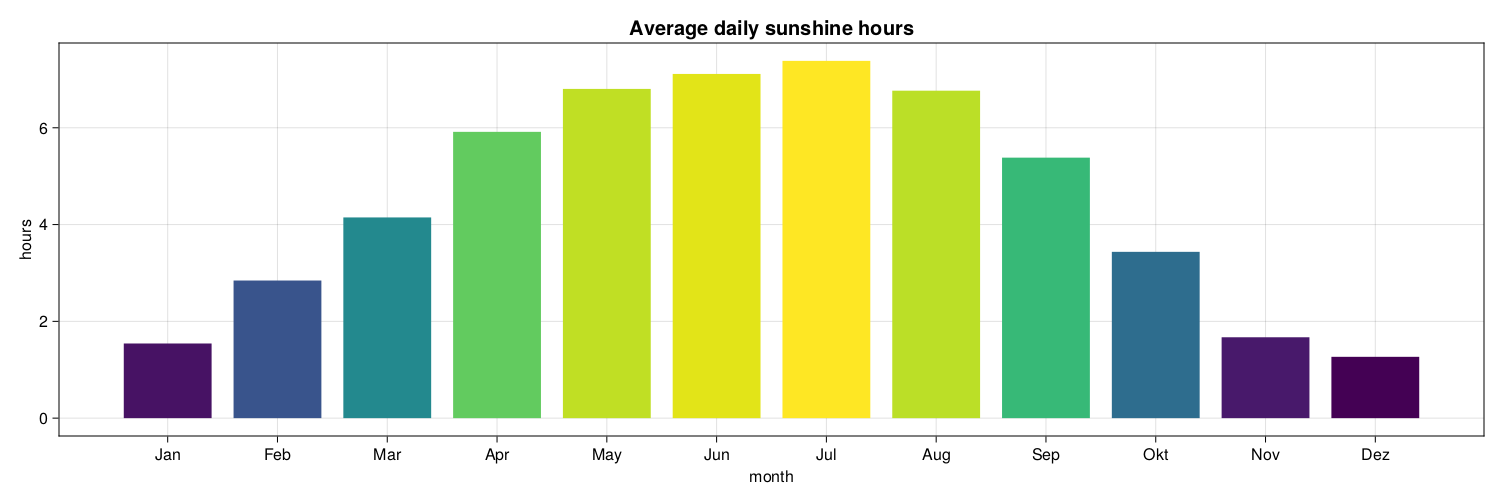

In [27]:
sunhine_per_month = @chain data begin
    @subset(:year .>= 1951)
    groupby(:month)
    @combine(:sunhours = mean(:sun)/60)
end


f11 = Figure(resolution = (1500,500))
ax11_1 = Axis(f11[1,1], xticks = (1:12,months), title = " Average daily sunshine hours ", titlesize = 20, xlabel = "month", ylabel = "hours")
bar11_1 = barplot!(ax11_1, sunhine_per_month.sunhours,color =sunhine_per_month.sunhours )

f11


We can also add the rain data to this plot, using the same method:

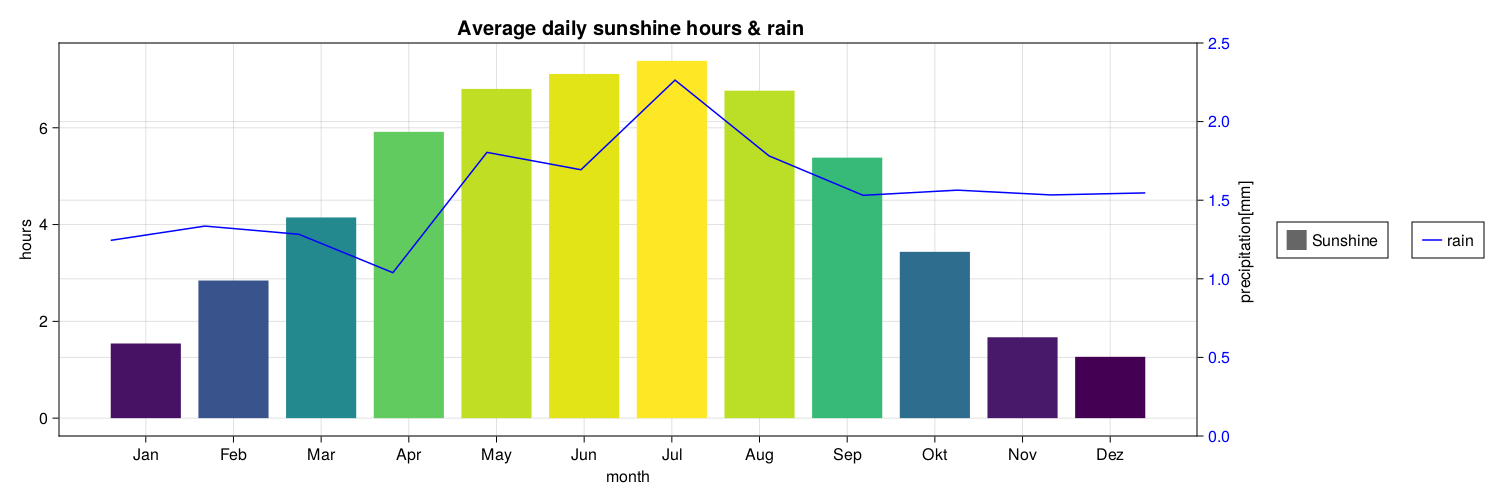

In [108]:
rain_per_month = @chain data begin
    @subset(:year .>= 1996)
    groupby(:month)
    @combine(:rain = mean(:rain))
end


f12 = Figure(resolution = (1500,500))
ax12_1 = Axis(f12[1,1], xticks = (1:12,months), title = " Average daily sunshine hours & rain", titlesize = 20, xlabel = "month", ylabel = "hours")
ax12_2 = Axis(f12[1,1], ylabel = "precipitation[mm] ",yticklabelcolor = :blue, yaxisposition = :right,)

hidespines!(ax12_2)
hidexdecorations!(ax12_2)
ylims!(ax12_2, 0, 2.5)
bar12_1 = barplot!(ax12_1, sunhine_per_month.sunhours,color =sunhine_per_month.sunhours, label = "Sunshine" )
line12_2 = lines!(ax12_2, rain_per_month.rain,color ="blue" ,label = "rain")


Legend( f12[1,2], [bar12_1,line12_2],["Sunshine","Rain"])

f12


### 8. Groupby with more than one attribute

It is also possible to group a dataframe by more than one shared colum value. In this case the `groupby()` function expects an vector of columnames. 
This can  be very useful for example if we want to figure out what have been the average sunshine hours per month in the last 10 years.

In [103]:
sunshine_10_years = @chain data begin
    @subset(:year .> 2010)
    #@subset(:month .> 4 , :month .< 9)
    groupby([:year, :month])
    @combine(:mean_sun_year = mean(:sun)/60)
    #groupby([:month])
    #@combine(:mean_sun_average = mean(:mean_sun_year))
end


Row,year,month,mean_sun_year
,Int64,Int64,Float64
1,2011,1,1.39355
2,2011,2,2.2131
3,2011,3,6.65645
4,2011,4,8.85833
5,2011,5,9.8086
6,2011,6,6.13722
7,2011,7,5.47742
8,2011,8,7.12366
9,2011,9,6.93667


Now we have a dataframe which contains values for every month in the last 10 years. When we use `groupby` again this time only on `:year` the dataframes get split up by years again. We can now create a figuar similar to f11 but add also single or multiple individual years with a loop.

In [104]:
sunshine_per_year = groupby(sunshine_10_years, :year)

Row,year,month,mean_sun_year
,Int64,Int64,Float64
1,2011,1,1.39355
2,2011,2,2.2131
3,2011,3,6.65645
4,2011,4,8.85833
5,2011,5,9.8086
6,2011,6,6.13722
7,2011,7,5.47742
8,2011,8,7.12366
9,2011,9,6.93667


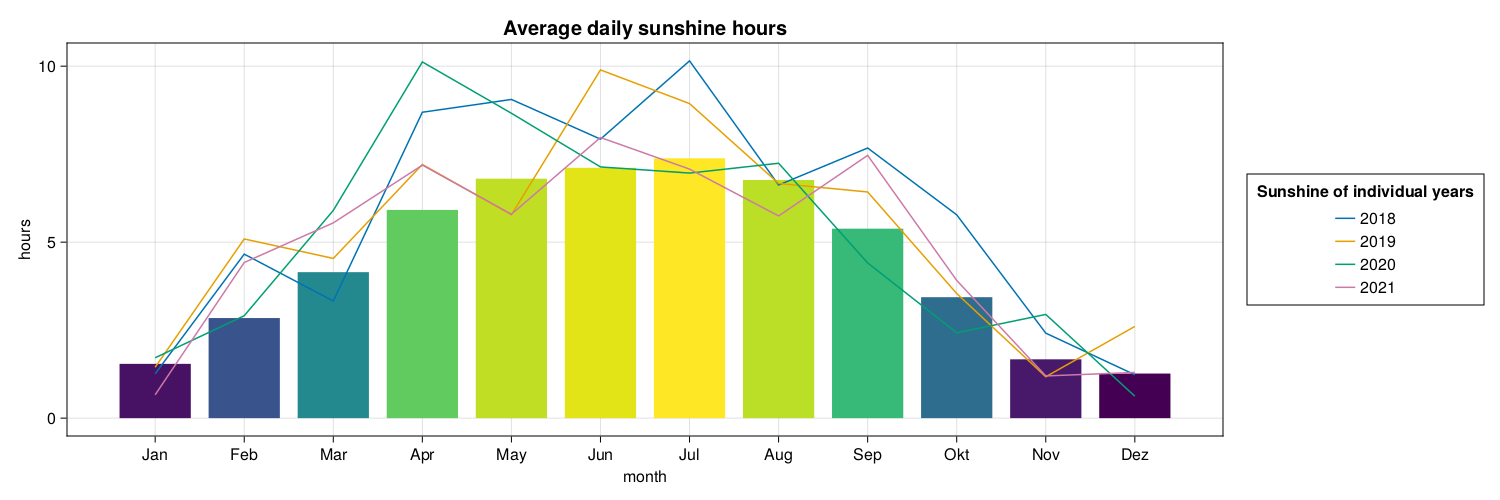

In [118]:
f13 = Figure(resolution = (1500,500))
ax13_1 = Axis(f13[1,1], xticks = (1:12,months), title = " Average daily sunshine hours ", titlesize = 20, xlabel = "month", ylabel = "hours")
bar13_1 = barplot!(ax13_1, sunhine_per_month.sunhours,color =sunhine_per_month.sunhours )

# choose years by changing iterator 
for i in 8:1:length(sunshine_per_year)
    lines!(ax13_1, sunshine_per_year[i].mean_sun_year, label = "$(sunshine_per_year[i].year[1])" )  
end
Legend( f13[1,2],ax13_1, "Sunshine of individual years")
f13


And it appears c0limate change has also some positive aspects, as the average daily sunshine hours of the last 4 years have been much higher than the average in the last 70 years. 

## Exercises

### <p style='color: green'>easy</p>


1. Create a dataframe named `millenium` only containing the values since 2000

2. Filter the dataframe so that it only contains your birthdays. 
- in which year did you have the best/worst weather to celebrate? 


3. Find out how many times since 2000, there has been a "white christmas" (snowfall on one or two days before christmas and temperatures below 0)  

4. Write a function that checks is a year is a leapyear. 


### <p style='color: orange'>medium</p>

4. Calculate the average temp values per month for all years before 1973, from 1974-1999 and from 2000 onwards. And plot them into one graph. Compare these values with the values from figure `f6`. What trend can we see. 

5. Find out what the column "Bedeckung"/"cover" means. Plot its monthly and yearly average since the year it has been measured. Interpret the data to your best ability. 

### <p style='color: red'>hard</p>

6. Calculate the standard deviation of the yearly temperatures. Is there a significat difference between years ? If so how can we interpret this?  

9. Split the original dataset (before the filter of the 29th of february) in two datasets using your function definied in exercise 4. One dataset should only contain leap years and the other one should only contain normal years.  

10. Compare the average temperatures per month and per year between the leap and normal years, is there a difference  ? 
